An optometrist prescribes type of contact lenses according to 4 features (age, prescription, astigmatism and tear production rate). The dataset is as below.

Calculate the Gini impurity index for each of the features. Note that age is an ordinal variable. Which feature indicates that contact lens should not be used?

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree

In [2]:
# Load data
df = pd.read_csv('C:/Users/Karthik.Iyer/Downloads/AccelerateAI/Tree-Based-Models-main/02_lens_prescription.csv')
df

,S No,Age,Prescription,Astigmatism,Tear production rate,Contact_lens
0,1,1,myope,no,reduced,no lens
1,2,1,myope,no,normal,soft
2,3,1,myope,yes,reduced,no lens
3,4,1,myope,yes,normal,hard
4,5,1,hypermetrope,no,reduced,no lens
5,6,1,hypermetrope,no,normal,soft
6,7,1,hypermetrope,yes,reduced,no lens
7,8,1,hypermetrope,yes,normal,hard
8,9,2,myope,no,reduced,no lens
9,10,2,myope,no,normal,soft


In [3]:
# Create dummies
pres_dummy = pd.get_dummies(df['Prescription'], prefix='pres', drop_first=True)
ast_dummy = pd.get_dummies(df['Astigmatism'], prefix='ast', drop_first=True)
tpr_dummy = pd.get_dummies(df['Tear production rate'], prefix='tpr', drop_first=True)

df = pd.concat([pres_dummy, ast_dummy, tpr_dummy, df], axis=1)

df.drop(['S No', 'Prescription', 'Astigmatism', 'Tear production rate'], axis=1, inplace=True)

df.head()

,pres_myope,ast_yes,tpr_reduced,Age,Contact_lens
0,1,0,1,1,no lens
1,1,0,0,1,soft
2,1,1,1,1,no lens
3,1,1,0,1,hard
4,0,0,1,1,no lens


In [4]:
# Check target
df['Contact_lens'].value_counts()

no lens    15
soft        5
hard        4
Name: Contact_lens, dtype: int64

In [5]:
# Map the categories
df['Contact_lens'] = df['Contact_lens'].map({'no lens': 1, 'soft': 2, 'hard': 3})

In [6]:
# Check data
df.head()

,pres_myope,ast_yes,tpr_reduced,Age,Contact_lens
0,1,0,1,1,1
1,1,0,0,1,2
2,1,1,1,1,1
3,1,1,0,1,3
4,0,0,1,1,1


In [7]:
# Train the classifier
X = df.drop('Contact_lens', axis=1)
y = df['Contact_lens']

clf = tree.DecisionTreeClassifier(criterion='gini')
clf = clf.fit(X,y)

[Ellipsis]

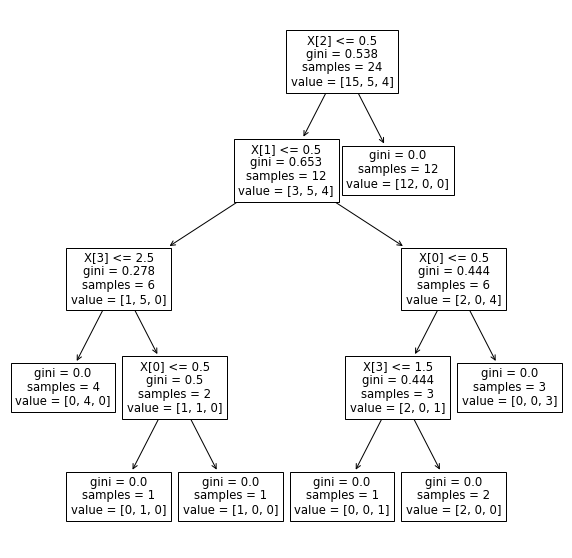

In [8]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf)
[...]

We can see that when the tear production rate is reduced and it is > 0.5, Gini imupurity index is 0, indicating there is no misclassification. And all the classes belong to no lens category.